# Code for article "A Mathematical Model of HIV Infection: Simulating T4, T8,Macrophages, Antibody, and Virus via Specific Anti-HIV Response in the Presence of Adaptation and Tropism", Freda Wasserstein-Robbins.

In [2]:
# https://link.springer.com/article/10.1007/s11538-009-9488-5
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [8]:
# define constants

def hiv(x,t,a_M,a_T,c2,c1,delta,e,f,k_8,k_m,k_v_,k_vm_,Macr,nu_Ab,nu_M,nu_4e,nu_4ie,nu_4n,nu_4in,nu_8e,nu_8n,nu_ii,nu_v,N,A,p,
        fi,p_im,po_Ab,po_4,po_8,r_4,r_8,v,s_,t1,t2,t3,k_Ab_):
    
    T_healthy_1_voln=[]
    T_healthy_2_voln=[]
    T_healthy_1=[]
    T_healthy_2=[]
    
    T_4n_voln=x[0]
    T_4e_voln=x[1]
    T_4n_i_voln=x[2]
    T_4e_i_voln=x[3]
    T_4n=x[4]
    T_4e=x[5]
    T_4n_i=x[6]
    T_4e_i= x[7]
    T_8n_voln=x[8]
    T_8e_voln=x[9]
    T_8n=x[10]
    T_8e=x[11]
    T_ii=x[12]
    S=x[13]
    M=x[14]
    V=x[15]
    
    
    s=s_*np.power((100-A-t/365)/100,1.8, dtype=np.float)
    u=(t+t1)/(t+t2)
    k_Ab=k_Ab_*(1+t/t3)*u
    k_v=k_v_*(1+t/t3)*u
    e_=e*(1+t/t3)*u
    k_vm=k_vm_*(1+t/t3)
    R=po_8*(T_ii+delta*(T_4n_i_voln+T_4n_i+T_4e_i_voln+ T_4e_i+a_T/a_M*M))
    
    dT_4n_volndt=v*f*(1-e_*V/(c1+V))*s+(1-fi)*po_4*V/(c2+V)*T_4n_voln-k_v*V/(c2+V)*T_4n_voln-nu_4n*T_4n_voln
    dT_4e_volndt=fi*po_4*V/(c2+V)*T_4n_voln-k_v*V/(c2+V)*T_4e_voln-nu_4e*T_4e_voln
    dT_4n_i_volndt=v*f*e_*V/(c1+V)*s+((1-fi)*(1-p)-p)*po_4*V/(c2+V)*T_4n_i_voln+ \
            k_v*V/(c2+V)*T_4n_voln-(k_8*delta*T_8e_voln+nu_4in)*T_4n_i_voln
    dT_4e_i_volndt=fi*(1-p)*po_4*V/(c2+V)*T_4n_i_voln+k_v*V/(c2+V)*T_4e_voln-(k_8*delta*T_8e_voln+nu_4ie)*T_4e_i_voln
    dT_4ndt=(1-v)*f*(1-e_*V/(c1+V))*s+(1-fi)*r_4*T_4n-k_v*V/(c2+V)*T_4n-nu_4n*T_4n
    dT_4edt=fi*r_4*T_4n-k_v*V/(c2+V)*T_4e-nu_4e*T_4e
    dT_4n_idt=(1-v)*f*e_*V/(c1+V)*s+((1-fi)*(1-p)-p)*r_4*T_4n_i+k_v*V/(c2+V)*T_4n-(k_8*delta*T_8e_voln+nu_4in)*T_4n_i
    dT_4e_idt=fi*(1-p)*r_4*T_4n_i+k_v*V/(c2+V)*T_4e-(k_8*delta*T_8e_voln+nu_4ie)* T_4e_i
    dT_8n_volndt=v*(1-f)*s+(1-fi)*R*T_8n_voln-nu_8n*T_8n_voln
    dT_8e_volndt=fi*R*T_8n_voln-nu_8e*T_8e_voln
    dT_8ndt=(1-v)*(1-f)*s+(1-fi)*r_8*T_8n-nu_8n*T_8n
    dT_8edt=fi*r_8*T_8n-nu_8e*T_8e
    dT_iidt=p*(r_4*T_4n_i+po_4*V/(c2+V)*T_4n_i_voln)-(k_8*T_8e_voln+nu_ii)*T_ii
    dSdt=po_Ab*(T_4e_voln+T_4e_i_voln)*V/(c2+V)-k_Ab*V*S-nu_Ab*S
    dMdt=k_vm*V/(c2+V)*(Macr-M)-(k_8*delta*T_8e_voln+nu_M)*M
    dVdt=p_im*M/a_M+N*nu_ii*T_ii/a_T-k_m*V/(c2+V)*Macr/a_M-e_*V/(c1+V)*s/a_T- \
            k_v/a_T*V/(c2+V)*(T_4n_voln+T_4e_voln+T_4n+T_4e)-k_Ab*S*V-nu_v*V
#     print(R)
    return [dT_4n_volndt, dT_4e_volndt,  dT_4n_i_volndt, dT_4e_i_volndt, dT_4ndt,\
            dT_4edt,dT_4n_idt, dT_4e_idt,dT_8n_volndt, dT_8e_volndt, dT_8ndt, dT_8edt,  \
            dT_iidt,  dSdt, dMdt,  dVdt]




# # initial condition
x0 = [0.92,0,0,0,920,379,0,0,0.47,0,467,150,0,0,0,3]


# constants

a_M=0.03
a_T=0.06
c2=1000
c1=616.6
delta=0.001
e=0.064
f=0.524
k_8=2.5
k_m=60
k_v_=0.089
k_vm_=1.19
Macr=360
nu_Ab=0.023
nu_M=0.087
nu_4e=0.015
nu_4ie=0.015
nu_4n=0.05
nu_4in=0.05
nu_8e=0.018
nu_8n=0.006
nu_ii=0.47
nu_v=3
N=850
A=36
p=0.03
fi=0.64
p_im=34
po_Ab=155
po_4=1.98
po_8=0.36
r_4=0.0097
r_8=0.0091
v=0.001
s_=6.09
t1=7
t2=42
t3=40000
k_Ab_=0.5


# # time points
t = np.linspace(0,1000)



In [9]:
# # solve ODE
x = odeint(hiv,x0,t, args=(a_M,a_T,c2,c1,delta,e,f,k_8,k_m,k_v_,k_vm_,Macr,nu_Ab,nu_M,nu_4e,nu_4ie,\
                           nu_4n,nu_4in,nu_8e,nu_8n,nu_ii, \
                           nu_v,N,A,p,fi,p_im,po_Ab,po_4,po_8,r_4,r_8,v,s_,t1,t2,t3,k_Ab_))

In [25]:
T_4n_voln=x[:,0]
T_4e_voln=x[:,1]
T_4n_i_voln=x[:,2]
T_4e_i_voln=x[:,3]
T_4n=x[:,4]
T_4e=x[:,5]
T_4n_i=x[:,6]
T_4e_i= x[:,7]
T_8n_voln=x[:,8]
T_8e_voln=x[:,9]
T_8n=x[:,10]
T_8e=x[:,11]
T_ii=x[:,12]
S=x[:,13]
M=x[:,14]
V=x[:,15]
values=[]
values=[T_4n_voln, T_4e_voln,T_4n_i_voln, T_4e_i_voln, T_4n, T_4e,T_4n_i, T_4e_i , T_8n_voln, T_8e_voln, T_8n,\
             T_8e, T_ii, S, M, V]
titles=['healthy hiv-specific-non-effector-T4 cells', 'healthy hiv-specific-effector-T4 cells',\
       'latently infected hiv-specific-non-effector-T4 cells','latently infected hiv-specific-effector-T4 cells' ,\
       'healthy non hiv-specific-non-effector-T4 cells', 'healthy non hiv-specific-effector-T4 cells',\
       'latently infected non hiv-specific-non-effector-T4 cells','latently infected non hiv-specific-effector-T4 cells' ,\
       'healthy hiv-specific-non-effector-T8 cells', 'healthy hiv-specific-effector-T8 cells',\
       'healthy non hiv-specific-non-effector-T8 cells', 'healthy non hiv-specific-effector-T8 cells',\
       'actively infected T4 cells', 'Antibodies', 'Infected Macrophages', 'Viruses']
ylabels=['cells/mm3']*13+['molecules/mm3', 'cells/mm3', 'particles/mm3']

# Log scale

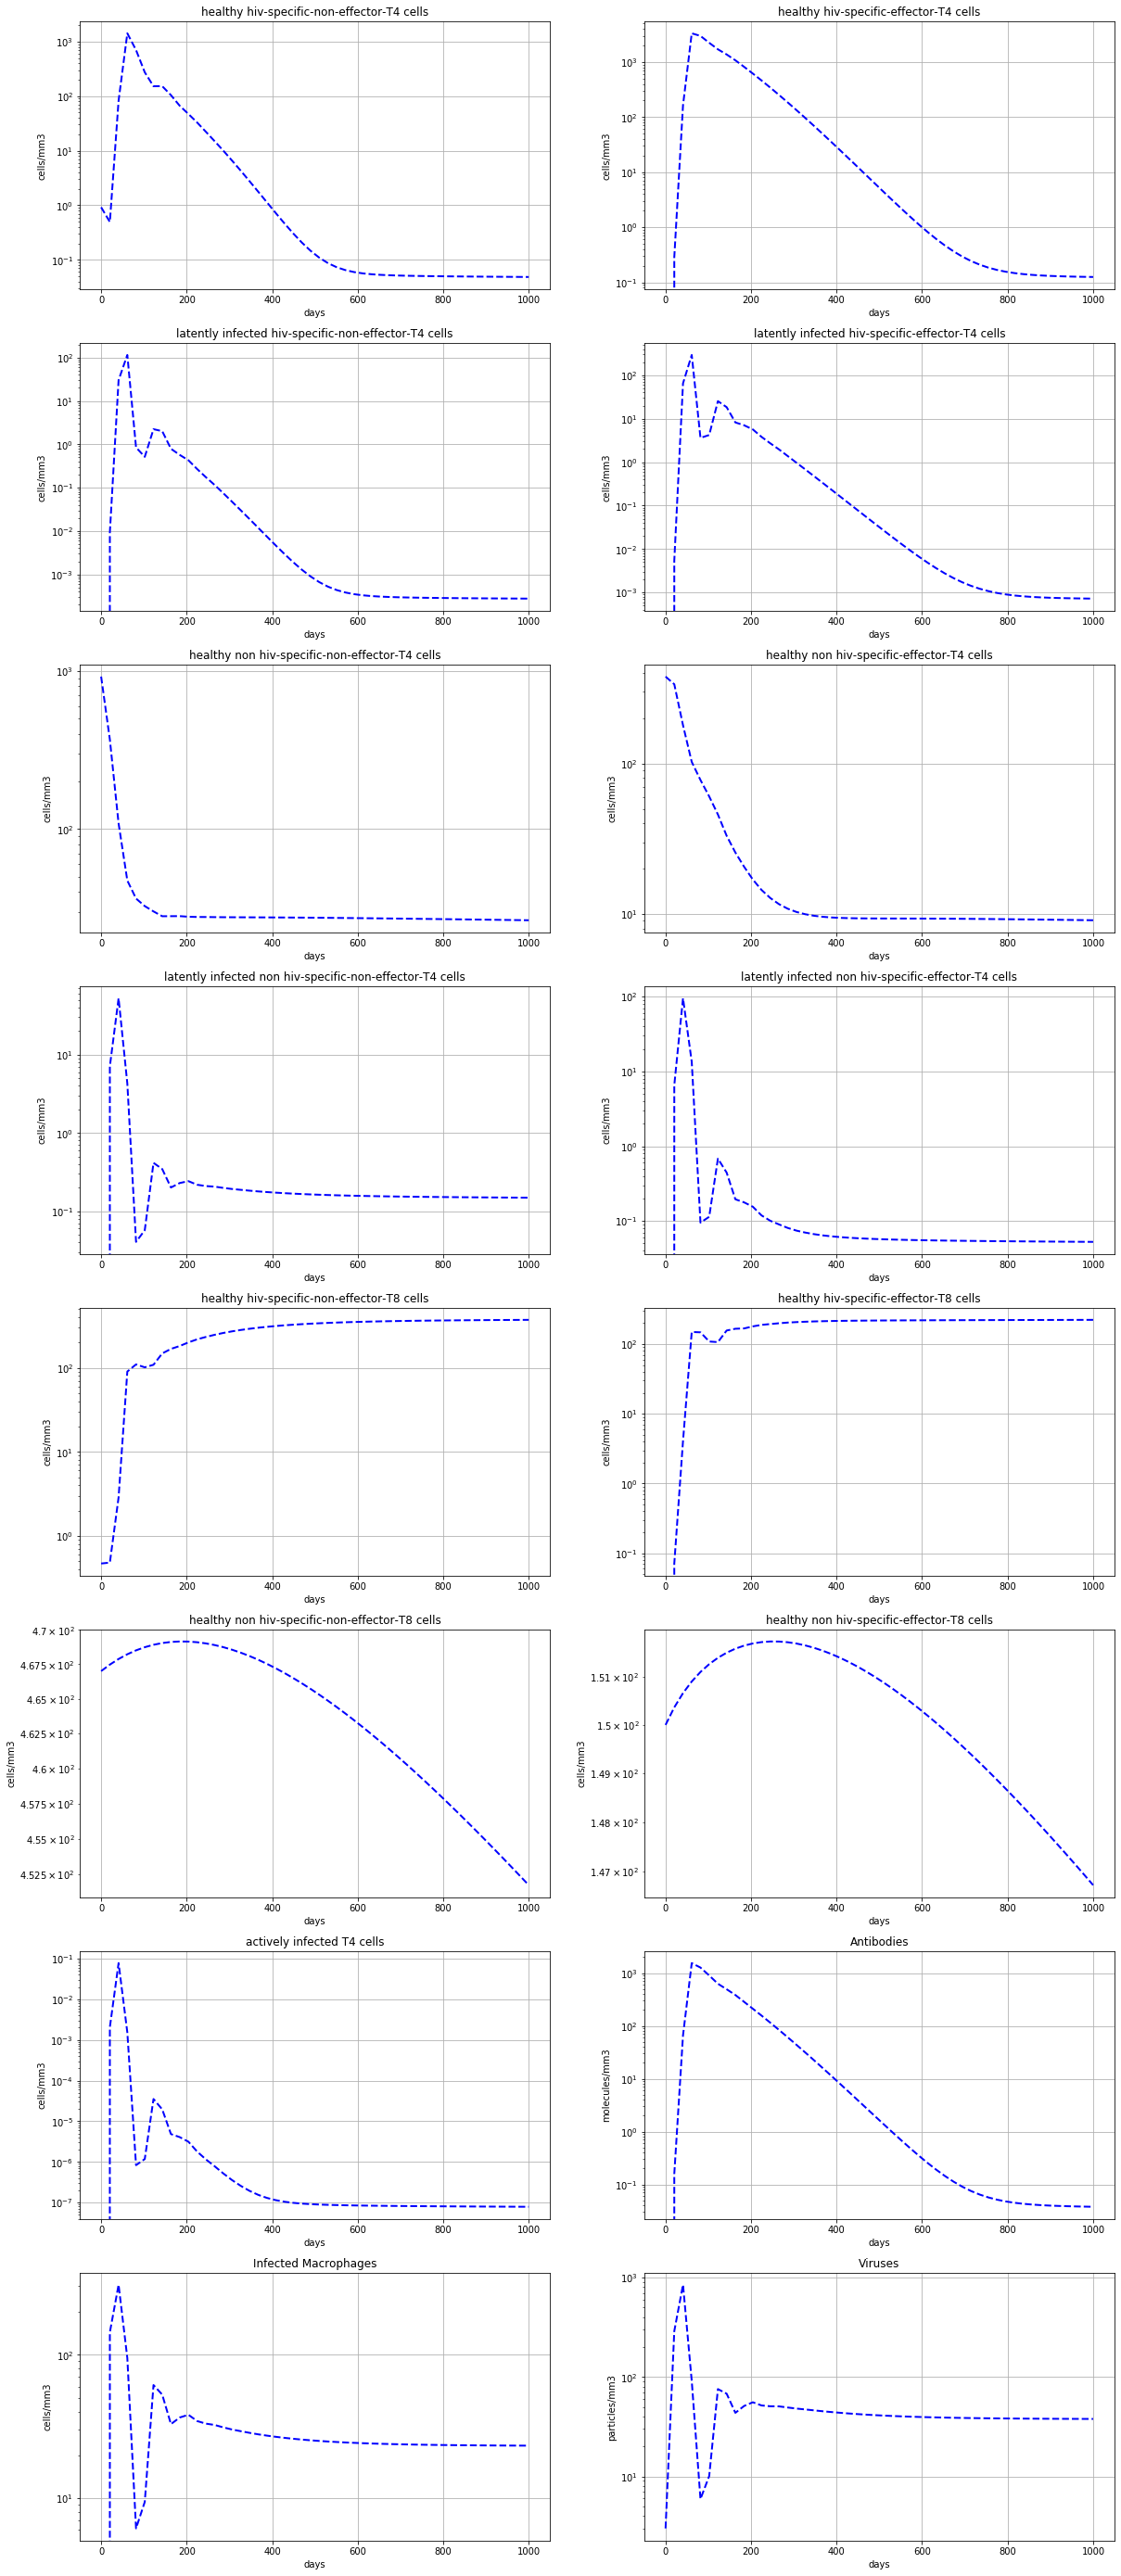

In [26]:
import matplotlib.pyplot as plt
# Импортируем один из пакетов Matplotlib
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 20, 50

# Импортируем пакет со вспомогательными функциями
from matplotlib import mlab

for i in range(len(values)):
    pylab.subplot (8, 2, i+1)
    pylab.semilogy(t,values[i],'b--',linewidth=2,label=titles[i])
    pylab.grid()
    pylab.ylabel(ylabels[i])
    pylab.xlabel('days')
    pylab.title (titles[i])

# Покажем окно с нарисованным графиком
pylab.show()

# Usual scale

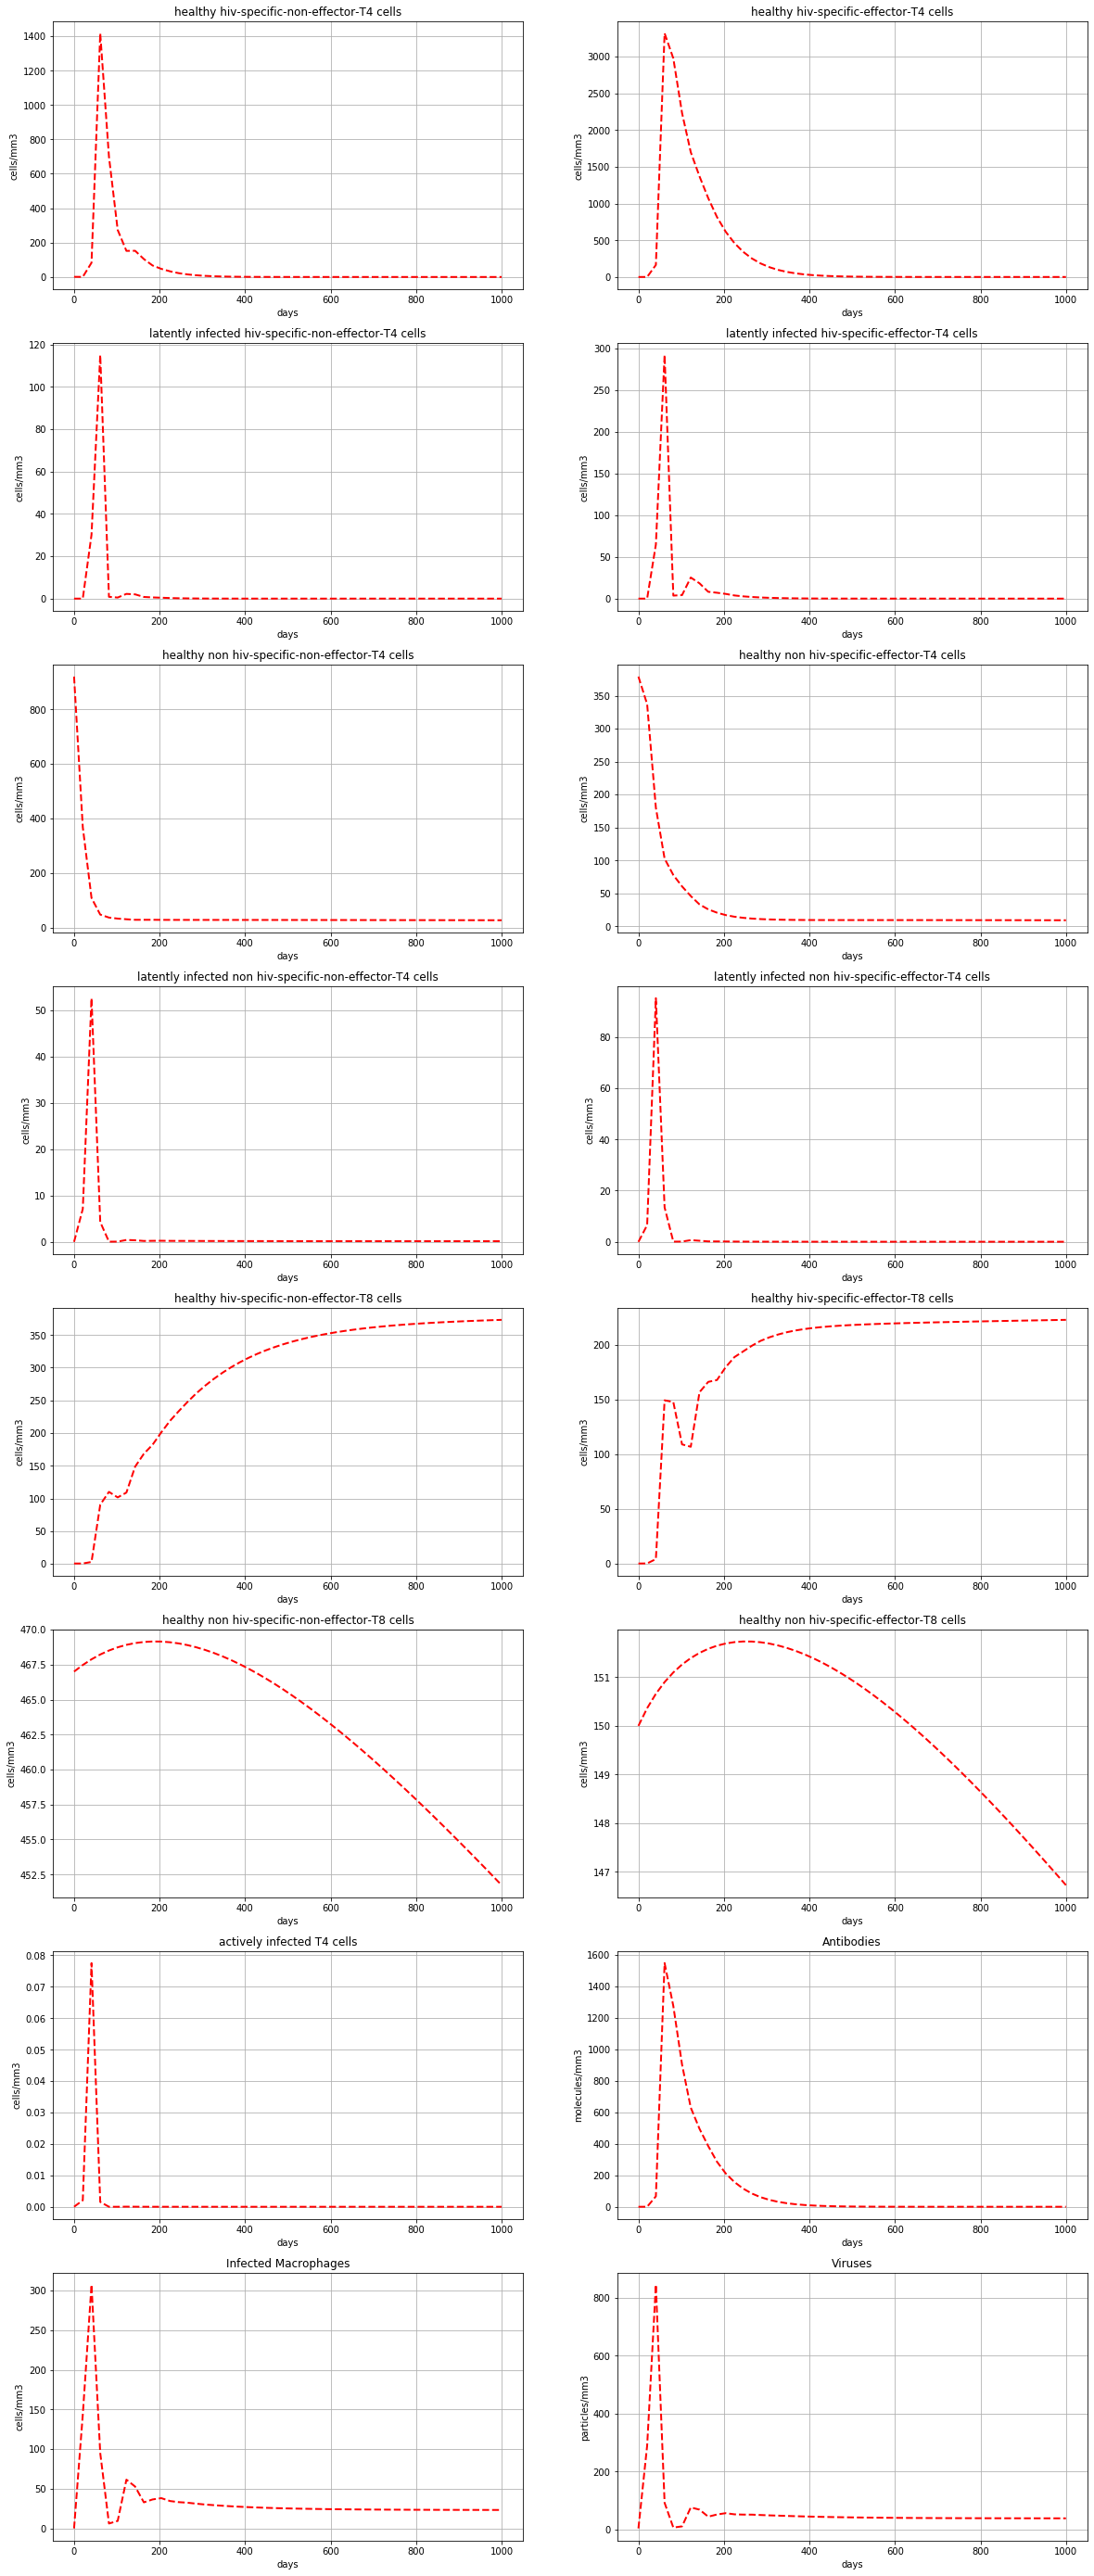

In [27]:
for i in range(len(values)):
    pylab.subplot (8, 2, i+1)
    pylab.plot(t,values[i],'r--',linewidth=2,label=titles[i])
    pylab.grid()
    pylab.ylabel(ylabels[i])
    pylab.xlabel('days')
    pylab.title (titles[i])

# Покажем окно с нарисованным графиком
pylab.show()